###  LOGISTIC REGRESSION

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
INFOSYS= pd.read_csv("D:/predict/data_techcom.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','chance_price','percent_change','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,chance_price,percent_change,Volume
0,2024-05-21,48100.00,48200.00,47050.00,47200.00,-1000,-0.02,11258500
1,2024-05-20,48442.45,48975.86,48054.53,48200.00,-50,0.00,11449601
2,2024-05-17,48248.49,48490.95,48151.51,48248.49,-150,0.00,6610750
3,2024-05-16,47036.22,48442.45,46939.24,48393.96,1800,0.04,21363102
4,2024-05-15,46454.33,46696.78,46308.85,46648.29,200,0.00,10026100


In [4]:
INFOSYS.describe()

,Open,High,Low,Close,chance_price,percent_change,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,35109.575150,35570.969640,34649.655380,35087.775620,-1.552000,0.000230,1.147617e+07
std,10126.757555,10239.304332,10016.929996,10109.106232,727.708741,0.021239,8.514470e+06
min,17650.700000,17844.670000,16971.830000,17602.210000,-3685.000000,-0.080000,7.066300e+05
25%,27239.787500,27639.840000,26742.755000,27154.930000,-350.000000,-0.010000,5.653875e+06
50%,33531.485000,34161.875000,32973.840000,33507.240000,0.000000,0.000000,9.064233e+06
75%,45981.542500,46587.677500,45399.652500,45933.052500,350.000000,0.010000,1.514422e+07
max,56055.530000,56831.390000,53921.930000,56249.500000,3103.000000,0.150000,7.498292e+07


In [5]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Open            1000 non-null   float64
 2   High            1000 non-null   float64
 3   Low             1000 non-null   float64
 4   Close           1000 non-null   float64
 5   chance_price    1000 non-null   int64  
 6   percent_change  1000 non-null   float64
 7   Volume          1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [6]:
INFOSYS.describe()

,Open,High,Low,Close,chance_price,percent_change,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,35109.575150,35570.969640,34649.655380,35087.775620,-1.552000,0.000230,1.147617e+07
std,10126.757555,10239.304332,10016.929996,10109.106232,727.708741,0.021239,8.514470e+06
min,17650.700000,17844.670000,16971.830000,17602.210000,-3685.000000,-0.080000,7.066300e+05
25%,27239.787500,27639.840000,26742.755000,27154.930000,-350.000000,-0.010000,5.653875e+06
50%,33531.485000,34161.875000,32973.840000,33507.240000,0.000000,0.000000,9.064233e+06
75%,45981.542500,46587.677500,45399.652500,45933.052500,350.000000,0.010000,1.514422e+07
max,56055.530000,56831.390000,53921.930000,56249.500000,3103.000000,0.150000,7.498292e+07


In [8]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [9]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [10]:
iplot(plot)

In [11]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-900.00,1150.00
1,-242.45,921.33
2,0.00,339.44
3,1357.74,1503.21
4,193.96,387.93


In [12]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [13]:
split_percentage = 0.7
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [15]:
model = LogisticRegression()
model = model.fit (X_train,Y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open-Close,[-0.005374571165581393]
1,High-Low,[-0.0005468964735327221]


In [16]:
probability = model.predict_proba(X_test)
print(probability)

[[5.70614176e-01 4.29385824e-01]
 [3.13314877e-01 6.86685123e-01]
 [6.51248775e-01 3.48751225e-01]
 [8.45667097e-03 9.91543329e-01]
 [9.98043598e-01 1.95640160e-03]
 [3.80277635e-01 6.19722365e-01]
 [9.99571396e-01 4.28603857e-04]
 [1.55930760e-04 9.99844069e-01]
 [1.21027389e-02 9.87897261e-01]
 [9.99197717e-01 8.02282768e-04]
 [4.75879223e-06 9.99995241e-01]
 [4.68490717e-01 5.31509283e-01]
 [2.51305615e-04 9.99748694e-01]
 [9.86142571e-01 1.38574293e-02]
 [9.94755035e-01 5.24496463e-03]
 [9.99956886e-01 4.31144180e-05]
 [3.23548465e-08 9.99999968e-01]
 [9.99999995e-01 5.16742674e-09]
 [7.91071674e-01 2.08928326e-01]
 [9.50176517e-01 4.98234833e-02]
 [5.25752648e-02 9.47424735e-01]
 [5.32410981e-01 4.67589019e-01]
 [9.98897370e-01 1.10262976e-03]
 [9.79857919e-01 2.01420815e-02]
 [2.00869712e-01 7.99130288e-01]
 [8.76397937e-01 1.23602063e-01]
 [7.63556490e-01 2.36443510e-01]
 [5.32396239e-01 4.67603761e-01]
 [6.32967893e-01 3.67032107e-01]
 [9.88556241e-01 1.14437585e-02]
 [4.118841

In [17]:
predicted = model.predict(X_test)

In [18]:
print(metrics.confusion_matrix(Y_test, predicted))

[[155  25]
 [ 19 101]]


In [19]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.89      0.86      0.88       180
           1       0.80      0.84      0.82       120

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



In [20]:
print(model.score(X_test,Y_test))

0.8533333333333334


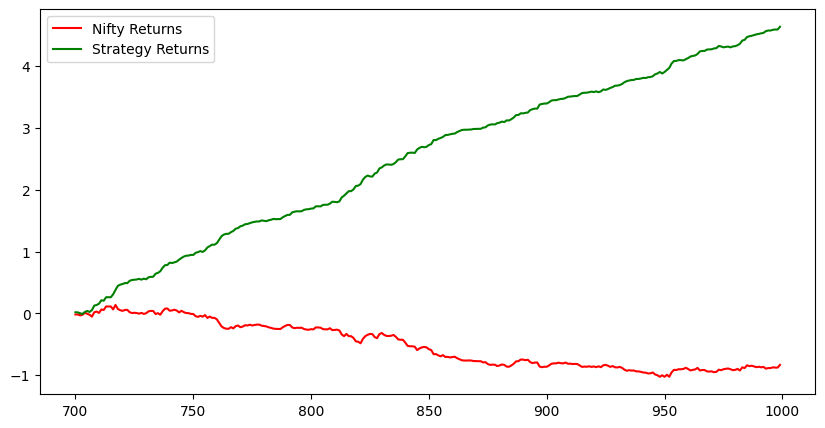

In [21]:
INFOSYS['Predicted_Signal'] = model.predict(X)
INFOSYS['Nifty_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(INFOSYS[split:]['Nifty_returns'])

INFOSYS['Startegy_returns'] = INFOSYS['Nifty_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(INFOSYS[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [23]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression ',model.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression  0.8533333333333334


In [24]:
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=100)
print('Accuracy of Infosys_Stock_Market_Price_Prediction after Cross_validation')
print(cross_val)
print(cross_val.mean())

Accuracy of Infosys_Stock_Market_Price_Prediction after Cross_validation
[0.7 0.8 0.9 0.8 1.  0.7 0.7 0.8 0.8 0.9 0.9 0.9 0.8 1.  0.8 0.8 0.9 0.9
 0.8 0.9 1.  0.8 0.8 1.  0.8 1.  0.9 0.9 1.  0.9 1.  0.9 0.7 1.  0.8 0.9
 0.8 0.8 0.8 0.9 0.7 0.6 0.6 0.6 0.8 0.9 0.8 0.9 0.9 1.  1.  0.9 0.8 0.7
 0.9 0.9 0.8 0.9 0.9 0.9 0.9 0.8 0.9 0.9 0.7 0.7 0.8 0.7 1.  0.9 0.5 1.
 0.8 0.9 0.8 0.9 0.9 0.8 0.9 0.9 0.6 1.  0.7 0.8 0.8 0.9 1.  0.9 0.9 0.6
 0.6 0.8 0.9 0.9 0.9 0.9 0.9 0.8 1.  1. ]
0.8460000000000001
